In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import sklearn as sk
import joblib
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,cross_validate
import timeit


In [2]:
random_seed = 108
test_size = 0.2

In [3]:
orig_data = pd.read_csv('TAVI-6 Predict TAVI 22MAR24_highlighted.csv',index_col=0)

C:\Users\harri\AppData\Local\Temp\ipykernel_19056\1241496511.py:1: DtypeWarning: Columns (138,189,192,194,224,226,228,230,232,234) have mixed types. Specify dtype option on import or set low_memory=False.
  orig_data = pd.read_csv('TAVI-6 Predict TAVI 22MAR24_highlighted.csv',index_col=0)


In [4]:
orig_data.head()

,gender,country,age,hospital_state,residential_loc_pre,race,insurance,cad,prior_acute_mi,prior_acute_mi_yes,...,QOL_score_12mth,SLS_score_12mth,kccq_summ_12mth,mobility_12mth,self_care_12mth,usual_activities_12mth,pain_discomfort_12mth,anxiety_dep_12mth,health_today_12mth,death_within_42d
ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,80.0,3.0,1.0,1.0,2.0,1.0,0.0,NaN,...,100.0,100.0,88.0,1.0,1.0,1.0,1.0,1.0,80.0,0.0
2,1.0,12.0,82.0,3.0,1.0,1.0,2.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2.0,12.0,86.0,3.0,2.0,1.0,2.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2.0,12.0,81.0,3.0,2.0,1.0,2.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,2.0,12.0,91.0,3.0,2.0,1.0,2.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
columns = [
    "gender"
    ,"country"
    ,'age'
    ,'hospital_state'
    ,'residential_loc_pre'
    ,'race'
    ,'insurance'
    ,'cad'
    ,'prior_acute_mi'
    #,'prior_acute_mi_yes'
    ,'prior_cardio_surg'
    ,'prior_pci'
    ,'prior_cabg'
    ,'prior_valve_replace'
    ,'prior_tavi'
    ,'prior_bav'
    ,'prior_af'
    ,'prior_generator'
    ,'porcelain_aorta'
    ,'prior_ccf'
    ,'prior_stroke'
    ,'prior_tia'
    ,'prior_carotid_sten'
    ,'prior_pad'
    ,'smoker'
    ,'chronic_lung'
    ,'hostile_chest'
    ,'hypertension'
    ,'diabetes'
    ,'ckd'
    ,'dialysis'
    ,'prior_radiotherapy'
    ,'long_term_steroid'
    ,'meds_ACE_ARB'
    ,'meds_xa_inibitor'
    ,'meds_aspirin'
    ,'meds_p2y12'
    ,'meds_beta_blocker'
    ,'meds_warfarin'
    ,'meds_doac'
    ,'meds_statins'
    ,'meds_diuretics'
    ,'meds_none'
    ,'nyha_status'
    ,'kccq_summ_bl'
    ,'height'
    ,'weight'
    ,'haemoglobin'
    ,'platelet_count'
    ,'albumin'
    ,'creatinine'
    ,'inr'
    ,'egfr_pre'
    ,'fev1'
    ,'ecg_rhythm_sinus'
    ,'ecg_rhythm_Fib_flutter'
    ,'ecg_rhythm_Fibrillation'
    ,'ecg_rhythm_flutter'
    ,'ecg_rhythm_paced'
    ,'ecg_rhythm_junctional'
    ,'ecg_conduct_none'
    ,'ecg_conduct_RBBB'
    ,'ecg_conduct_LBBB'
    ,'ecg_conduct_1DAVBlock'
    ,'ecg_conduct_2DAVBlock'
    ,'ecg_conduct_3DAVBlock'
    ,'ecg_conduct_Paced'
    ,'diseased_vessels_number'
    ,'lm_sten'
    ,'prox_lad'
    ,'rv_systolic'
    ,'lvef_value'
    ,'lvef_value_scale'
    ,'lv_internal_sys_dim_value'
    ,'lv_internal_dia_dim_value'
    ,'septal_wall'
    ,'posterior_wall'
    ,'av_peak_vel'
    ,'av_mean_grad_tte'
    ,'av_area_tte'
    ,'dp_index_tte_pre'
    ,'aortic_insuff'
    ,'mitral_regurg'
    ,'av_disease_etiology'
    ,'annulus_max_dim'
    ,'annulus_min_dim'
    ,'perimeter'
    ,'annulus_area_ctaort'
    ,'st_junc_diam'
    ,'valve_calc'
    ,'annualar_calc_ctaort'
    ,'valve_morph'
    ,'aortic_sinus_dim_left'
    ,'aortic_sinus_dim_right'
    ,'aortic_sinus_dim_non_coron'
    ,'ascending_ao'
    ,'lmca_height'
    ,'rca_height'
    ,'iliac_mld_left'
    ,'iliac_mld_right'
    ,'femoral_mld_left'
    ,'femoral_mld_right'
    ,'artery_calc'
    ,'iliofem_tort'
    ,'high_cfa_burif'
    #,'high_cfa_burif_yes'
    ,'prev_iliofem_interv'
    #,'prev_iliofem_interv_yes'
    ,'procedure_indic'
    #,'bio_valve_fail_reason'
    ,'valve_in_valve'
    ,'anaesthesia'
    ,'access_site'
    ,'access_method'
    ,'initial_bav'
    ,'device_manufacturer_1'
    ,'device_model_1'
]


    
categorical_col = [
    "gender"
    ,"country"
    ,'hospital_state'
    ,'residential_loc_pre'
    ,'race'
    ,'insurance'
    ,'cad'
    ,'prior_acute_mi'
    #,'prior_acute_mi_yes'
    ,'prior_cardio_surg'
    ,'prior_pci'
    ,'prior_cabg'
    ,'prior_valve_replace'
    ,'prior_tavi'
    ,'prior_bav'
    ,'prior_af'
    ,'prior_generator'
    ,'porcelain_aorta'
    ,'prior_ccf'
    ,'prior_stroke'
    ,'prior_tia'
    ,'prior_carotid_sten'
    ,'prior_pad'
    ,'smoker'
    ,'chronic_lung'
    ,'hostile_chest'
    ,'hypertension'
    ,'diabetes'
    ,'ckd'
    ,'dialysis'
    ,'prior_radiotherapy'
    ,'long_term_steroid'
    ,'meds_ACE_ARB'
    ,'meds_xa_inibitor'
    ,'meds_aspirin'
    ,'meds_p2y12'
    ,'meds_beta_blocker'
    ,'meds_warfarin'
    ,'meds_doac'
    ,'meds_statins'
    ,'meds_diuretics'
    ,'meds_none'
    ,'nyha_status'
    ,'ecg_rhythm_sinus'
    ,'ecg_rhythm_Fib_flutter'
    ,'ecg_rhythm_Fibrillation'
    ,'ecg_rhythm_flutter'
    ,'ecg_rhythm_paced'
    ,'ecg_rhythm_junctional'
    ,'ecg_conduct_none'
    ,'ecg_conduct_RBBB'
    ,'ecg_conduct_LBBB'
    ,'ecg_conduct_1DAVBlock'
    ,'ecg_conduct_2DAVBlock'
    ,'ecg_conduct_3DAVBlock'
    ,'ecg_conduct_Paced'
    ,'diseased_vessels_number'
    ,'lm_sten'
    ,'prox_lad'
    ,'aortic_insuff'
    ,'mitral_regurg'
    ,'lvef_value_scale'
    ,'av_disease_etiology'
    ,'valve_calc'
    ,'annualar_calc_ctaort'
    ,'valve_morph'
    ,'artery_calc'
    ,'iliofem_tort'
    ,'high_cfa_burif'
    #,'high_cfa_burif_yes'
    ,'prev_iliofem_interv'
    #,'prev_iliofem_interv_yes'
    ,'procedure_indic'
    #,'bio_valve_fail_reason'
    ,'valve_in_valve'
    ,'anaesthesia'
    ,'access_site'
    ,'access_method'
    ,'initial_bav'
    ,'device_manufacturer_1'
    ,'device_model_1'
]

float_col = [x for x in columns if x not in categorical_col]



#df['death'] = [1 if x == 1 or x == 2 else 0 for x in df['discharge_status']]
#df['vaccinated'] = [1 if x == 2 or x == 3 or  x == 4 else 0 for x in df['vaccination_status']]

predictors = [
    'discharge_status'
    ,'fup_status_30d'
    ,'fup_status_12mth'
    ,'days_death'
    ,'LOS'
    ,'days_30d_fup'
    ,'days_12mth_fup'
    ,'proc_los'
]

In [6]:
df = orig_data[columns+predictors]

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    null_counts = pd.concat(
        [
            df.isnull().sum().sort_values(ascending=False),
            df.isnull().sum().sort_values(ascending=False)/df.shape[0]
        ],
        keys=['counts', '% missing'],
        axis=1)
    print(null_counts)

                            counts  % missing
days_death                   15468   0.954402
fev1                         10639   0.656445
rv_systolic                   7776   0.479793
days_12mth_fup                7168   0.442278
fup_status_12mth              7110   0.438699
lv_internal_sys_dim_value     5643   0.348183
dp_index_tte_pre              4256   0.262603
inr                           4239   0.261554
aortic_sinus_dim_non_coron    3587   0.221324
aortic_sinus_dim_right        3505   0.216265
aortic_sinus_dim_left         3495   0.215648
st_junc_diam                  3010   0.185722
av_area_tte                   2251   0.138891
lvef_value_scale              2226   0.137348
annualar_calc_ctaort          2175   0.134201
lv_internal_dia_dim_value     2170   0.133893
iliac_mld_left                2122   0.130931
iliac_mld_right               2108   0.130067
posterior_wall                2080   0.128340
septal_wall                   1919   0.118406
annulus_area_ctaort           1826

C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


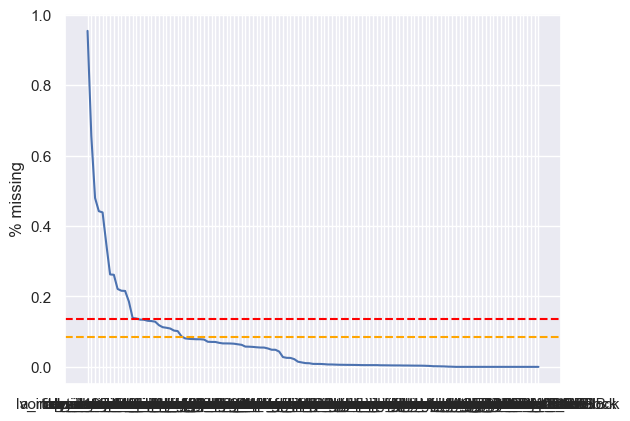

In [8]:
# lets drop features where there are more than 13.6% missing
ax = sns.lineplot(null_counts,x=null_counts.index,y='% missing')
ax.axhline(y = 0.136761,color='red',linestyle = '--') 
ax.axhline(y = 0.084600,color='orange',linestyle = '--') 

pd.concat(
        [
            df.isnull().sum().sort_values(ascending=False),
            df.isnull().sum().sort_values(ascending=False)/df.shape[0]
        ],
        keys=['counts', '% missing'],
        axis=1).to_csv("null_counts.csv")

In [9]:
for p in predictors:
    print(
        pd.concat(
        [
            df[p].value_counts(dropna=False).sort_index(),
            df[p].value_counts(dropna=False,normalize=True).sort_index()
        ],
        keys=['counts', 'normalized_counts'],
        axis=1)
    )


                  counts  normalized_counts
discharge_status                           
1.0                15966           0.985130
2.0                  150           0.009255
NaN                   91           0.005615
                counts  normalized_counts
fup_status_30d                           
1.0              14603           0.901030
2.0                115           0.007096
3.0                119           0.007343
4.0                 84           0.005183
5.0                 28           0.001728
NaN               1258           0.077621
                  counts  normalized_counts
fup_status_12mth                           
1.0                 8123           0.501203
2.0                  589           0.036342
3.0                  300           0.018511
4.0                   26           0.001604
5.0                   59           0.003640
NaN                 7110           0.438699
            counts  normalized_counts
days_death                           
0.0             

In [10]:
df.groupby(predictors[0:3],dropna=False).size().unstack(fill_value=0)

fup_status_12mth                  1.0  2.0  3.0  4.0  5.0   NaN
discharge_status fup_status_30d                                
1.0              1.0             7969  570  274   25   55  5707
                 2.0                0    3    0    0    0   106
                 3.0               49    2   19    0    2    47
                 4.0               35    9    0    0    0    36
                 5.0                7    1    3    1    0    16
                 NaN               63    2    4    0    2   959
2.0              2.0                0    0    0    0    0     5
                 4.0                0    0    0    0    0     1
                 NaN                0    1    0    0    0   143
NaN              1.0                0    0    0    0    0     3
                 2.0                0    0    0    0    0     1
                 4.0                0    1    0    0    0     2
                 NaN                0    0    0    0    0    84

In [11]:
# remove rows where there are no outcomes of mortality recorded
df = df.query("discharge_status.notna() or fup_status_12mth.notna() or fup_status_30d.notna()")

In [12]:
df.groupby(predictors[0:3],dropna=False).size().unstack(fill_value=0)

fup_status_12mth                  1.0  2.0  3.0  4.0  5.0   NaN
discharge_status fup_status_30d                                
1.0              1.0             7969  570  274   25   55  5707
                 2.0                0    3    0    0    0   106
                 3.0               49    2   19    0    2    47
                 4.0               35    9    0    0    0    36
                 5.0                7    1    3    1    0    16
                 NaN               63    2    4    0    2   959
2.0              2.0                0    0    0    0    0     5
                 4.0                0    0    0    0    0     1
                 NaN                0    1    0    0    0   143
NaN              1.0                0    0    0    0    0     3
                 2.0                0    0    0    0    0     1
                 4.0                0    1    0    0    0     2

In [13]:
# if patient is alive at 12months, change their status to alive at 30days and discharge
def update_fup_status(follow_up,future_follow_up):
    if future_follow_up == 1 or future_follow_up == 4:
        return 1
    else:
        return follow_up
    

# if patient is dead, at an earlier time interval, apply it forward in time
def update_fup_status_death(follow_up,future_follow_up):
    if follow_up == 2:
        return 2
    else:
        return future_follow_up

In [14]:
df["discharge_status_new"] = df["discharge_status"]
df["fup_status_12mth_new"] = df["fup_status_12mth"]
df["fup_status_30d_new"] = df["fup_status_30d"]
    

In [15]:
df["discharge_status_new"] = df.apply(lambda x: update_fup_status(x['discharge_status_new'], x['fup_status_12mth_new']), axis=1)
df["discharge_status_new"] = df.apply(lambda x: update_fup_status(x['discharge_status_new'], x['fup_status_30d_new']), axis=1)
df["fup_status_30d_new"] = df.apply(lambda x: update_fup_status(x['fup_status_30d_new'], x['fup_status_12mth_new']), axis=1)

df["fup_status_12mth_new"] = df.apply(lambda x: update_fup_status_death(x['discharge_status_new'], x['fup_status_12mth_new']), axis=1)
df["fup_status_12mth_new"] = df.apply(lambda x: update_fup_status_death(x['fup_status_30d_new'], x['fup_status_12mth_new']), axis=1)
df["fup_status_30d_new"] = df.apply(lambda x: update_fup_status_death(x['discharge_status_new'], x['fup_status_30d_new']), axis=1)



In [16]:
df.loc[13250,"discharge_status_new"] = 2
df.loc[df["fup_status_30d_new"] == 4,"fup_status_30d_new"] = 1
df.loc[df["fup_status_30d_new"] == 3,"fup_status_30d_new"] = np.nan
df.loc[df["fup_status_30d_new"] == 5,"fup_status_30d_new"] = np.nan
df.loc[df["fup_status_12mth_new"] == 4,"fup_status_12mth_new"] = 1
df.loc[df["fup_status_12mth_new"] == 5,"fup_status_12mth_new"] = np.nan
df.loc[df["fup_status_12mth_new"] == 3,"fup_status_12mth_new"] = np.nan

In [17]:
df[["discharge_status_new","fup_status_12mth_new","fup_status_30d_new"]].groupby(["discharge_status_new","fup_status_12mth_new","fup_status_30d_new"],dropna=False).size().unstack(fill_value=0)

fup_status_30d_new                          1.0  2.0   NaN
discharge_status_new fup_status_12mth_new                 
1.0                  1.0                   8149    0     0
                     2.0                    580  109     5
                     NaN                   6078    0  1052
2.0                  2.0                      0  150     0

In [18]:
# typo for this person's weight
df.loc[1570,'weight'] = 120 #previously 120661
df.loc[10025,'weight'] = 52 #previously 527

df.loc[12210,'av_peak_vel'] = 3.2
df.loc[11704,'av_peak_vel'] = 6.5
df.loc[11939,'platelet_count'] = 253000
df.loc[11939,'av_peak_vel'] = 1.3
df.loc[10636,'av_area_tte']=3.0

In [19]:
## we remove patients without a 12 month follow up
## this is for train2 and test2
#df = df.query("fup_status_12mth_new.notna()")

In [20]:
df[["discharge_status_new","fup_status_12mth_new","fup_status_30d_new"]].groupby(["discharge_status_new","fup_status_12mth_new","fup_status_30d_new"],dropna=False).size().unstack(fill_value=0)

fup_status_30d_new                          1.0  2.0   NaN
discharge_status_new fup_status_12mth_new                 
1.0                  1.0                   8149    0     0
                     2.0                    580  109     5
                     NaN                   6078    0  1052
2.0                  2.0                      0  150     0

In [21]:
df["upper_bound"] = np.nan
df["lower_bound"] = np.nan
df["death_observed"] = np.nan
df["death_in_study"] = np.nan

In [22]:
def calculate_upper_lower_bounds(discharge,fup_30d,fup_12m,los,days_death,days_30d_fup,days_12mth_fup,proc_los):
    lower_bound = np.nan
    upper_bound = np.nan
    death_observed = np.nan
    death_in_study = np.nan
    # we have the days to death then
    if not np.isnan(days_death):
        lower_bound = days_death
        upper_bound = days_death
        death_observed = True
        death_in_study = True
    # patient has not died in the study
    elif ((discharge == 1 and fup_30d == 1  and fup_12m == 1)
        or (discharge == 1 and np.isnan(fup_30d) and np.isnan(fup_12m))):
        if los < 2000:
            lower_bound = np.nanmax([0,los,days_30d_fup,days_12mth_fup])
        else:
            lower_bound = np.nanmax([0,proc_los,days_30d_fup,days_12mth_fup])
        upper_bound = np.inf
        death_observed = False
        death_in_study = False
    elif discharge == 1 and fup_30d == 1  and np.isnan(fup_12m):
        if not np.isnan(days_30d_fup) and days_30d_fup >= 0:
            lower_bound = days_30d_fup
        else:
            lower_bound = 30
        upper_bound = np.inf
        death_observed = False
        death_in_study = False
    elif discharge == 1 and fup_30d == 2  and fup_12m == 2:
        lower_bound = np.nanmax([los,proc_los])
        if not np.isnan(days_30d_fup):
            upper_bound = np.nanmax([los,days_30d_fup])
        else:
            upper_bound = np.nanmax([los,30])
        death_observed = False
        death_in_study = True
    elif discharge == 1 and fup_30d != 2  and fup_12m == 2:
        if los < 2000:
            lower_bound = np.nanmax([los,days_30d_fup])
        else:
            lower_bound = days_30d_fup
        
        if los < 2000:
            upper_bound = np.nanmax([los,days_30d_fup,days_12mth_fup])
        else:
            upper_bound = np.nanmax([days_30d_fup,days_12mth_fup])
        death_observed = False
        death_in_study = True
    else:
        pass
    
    return (
        lower_bound,
        upper_bound,
        death_observed,
        death_in_study
    )


In [23]:
df[["lower_bound","upper_bound","death_observed","death_in_study"]] = df.apply(
    lambda x: calculate_upper_lower_bounds(
        x['discharge_status_new'], 
        x['fup_status_30d_new'],
        x['fup_status_12mth_new'],
        x['LOS'],
        x['days_death'],
        x['days_30d_fup'],
        x['days_12mth_fup'],
        x['proc_los']
    ), axis=1
    , result_type='expand')

In [24]:
df.query('lower_bound.isna()')

,gender,country,age,hospital_state,residential_loc_pre,race,insurance,cad,prior_acute_mi,prior_cardio_surg,...,days_30d_fup,days_12mth_fup,proc_los,discharge_status_new,fup_status_12mth_new,fup_status_30d_new,upper_bound,lower_bound,death_observed,death_in_study
ID,,,,,,,,,,,,,,,,,,,,,


In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.query('death_observed.isna()')[predictors + ["lower_bound","upper_bound","death_observed","death_in_study"]])

Empty DataFrame
Columns: [discharge_status, fup_status_30d, fup_status_12mth, days_death, LOS, days_30d_fup, days_12mth_fup, proc_los, lower_bound, upper_bound, death_observed, death_in_study]
Index: []


In [26]:
df.query('lower_bound == upper_bound and not death_observed')

,gender,country,age,hospital_state,residential_loc_pre,race,insurance,cad,prior_acute_mi,prior_cardio_surg,...,days_30d_fup,days_12mth_fup,proc_los,discharge_status_new,fup_status_12mth_new,fup_status_30d_new,upper_bound,lower_bound,death_observed,death_in_study
ID,,,,,,,,,,,,,,,,,,,,,
4223,2.0,12.0,84.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,...,-316.0,NaN,3.0,1.0,2.0,2.0,4.0,4.0,False,True


In [27]:
df.loc[4223,'lower_bound'] = 365-316
df.loc[4223,'upper_bound'] = 365-316
df.loc[4223,'death_observed'] = True

In [28]:
df.query('lower_bound < 0 ')

,gender,country,age,hospital_state,residential_loc_pre,race,insurance,cad,prior_acute_mi,prior_cardio_surg,...,days_30d_fup,days_12mth_fup,proc_los,discharge_status_new,fup_status_12mth_new,fup_status_30d_new,upper_bound,lower_bound,death_observed,death_in_study
ID,,,,,,,,,,,,,,,,,,,,,


In [29]:
df.query('upper_bound < 0 ')

,gender,country,age,hospital_state,residential_loc_pre,race,insurance,cad,prior_acute_mi,prior_cardio_surg,...,days_30d_fup,days_12mth_fup,proc_los,discharge_status_new,fup_status_12mth_new,fup_status_30d_new,upper_bound,lower_bound,death_observed,death_in_study
ID,,,,,,,,,,,,,,,,,,,,,


In [30]:
df.query('lower_bound.isna()')

,gender,country,age,hospital_state,residential_loc_pre,race,insurance,cad,prior_acute_mi,prior_cardio_surg,...,days_30d_fup,days_12mth_fup,proc_los,discharge_status_new,fup_status_12mth_new,fup_status_30d_new,upper_bound,lower_bound,death_observed,death_in_study
ID,,,,,,,,,,,,,,,,,,,,,


## Feature engineering

In [31]:
df["bmi"] = df["weight"]/(df["height"]/100)**2
columns += ["bmi"]
float_col += ["bmi"]

In [32]:
print(df.query('lvef_value_scale.isna() and lvef_value.notna()')[['lvef_value_scale','lvef_value']].count())
df.query('lvef_value.isna() and lvef_value_scale.notna()')[['lvef_value_scale','lvef_value']].count()

lvef_value_scale      0
lvef_value          563
dtype: int64


lvef_value_scale    102
lvef_value            0
dtype: int64

In [33]:
df.groupby('lvef_value_scale')['lvef_value'].describe()

,count,mean,std,min,25%,50%,75%,max
lvef_value_scale,,,,,,,,
1.0,10276.0,63.326975,5.839903,55.0,60.0,63.0,67.0,95.0
2.0,2358.0,47.514843,4.364734,40.0,45.0,49.0,50.0,54.0
3.0,795.0,34.086792,2.931848,30.0,31.0,35.0,36.0,39.0
4.0,411.0,23.009732,4.425525,5.0,20.0,25.0,25.5,29.0


In [34]:
def impute_lvef_group(row):
    lvef_value = row['lvef_value']
    if  lvef_value>= 55:
        group = 1
    elif lvef_value < 55 and lvef_value >= 40:
        group = 2
    elif lvef_value < 40 and lvef_value >30:
        group = 3
    else:
        group = 4
    return group

In [35]:
def impute_lvef_value(row):
    # we impute with median
    lvef_value = row['lvef_value_scale']
    if  lvef_value == 1:
        value = 63
    elif lvef_value == 2:
        value = 48
    elif lvef_value == 3:
        value = 35
    else:
        value = 25
    return value

In [36]:
missing_lvef_group_idx = df.query('lvef_value_scale.isna() and lvef_value.notna()').index
df.loc[missing_lvef_group_idx,'lvef_value_scale'] = df.loc[missing_lvef_group_idx,:].apply(impute_lvef_group,axis=1)

missing_lvef_idx = df.query('lvef_value.isna() and lvef_value_scale.notna()').index
df.loc[missing_lvef_idx,'lvef_value'] = df.loc[missing_lvef_idx,:].apply(impute_lvef_value,axis=1)

In [37]:
print(df.query('lvef_value_scale.isna() and lvef_value.notna()')[['lvef_value_scale','lvef_value']].count())
df.query('lvef_value.isna() and lvef_value_scale.notna()')[['lvef_value_scale','lvef_value']].count()

lvef_value_scale    0
lvef_value          0
dtype: int64


lvef_value_scale    0
lvef_value          0
dtype: int64

In [38]:
df.to_csv("predict_tavi_clean.csv") # this data is for table 1

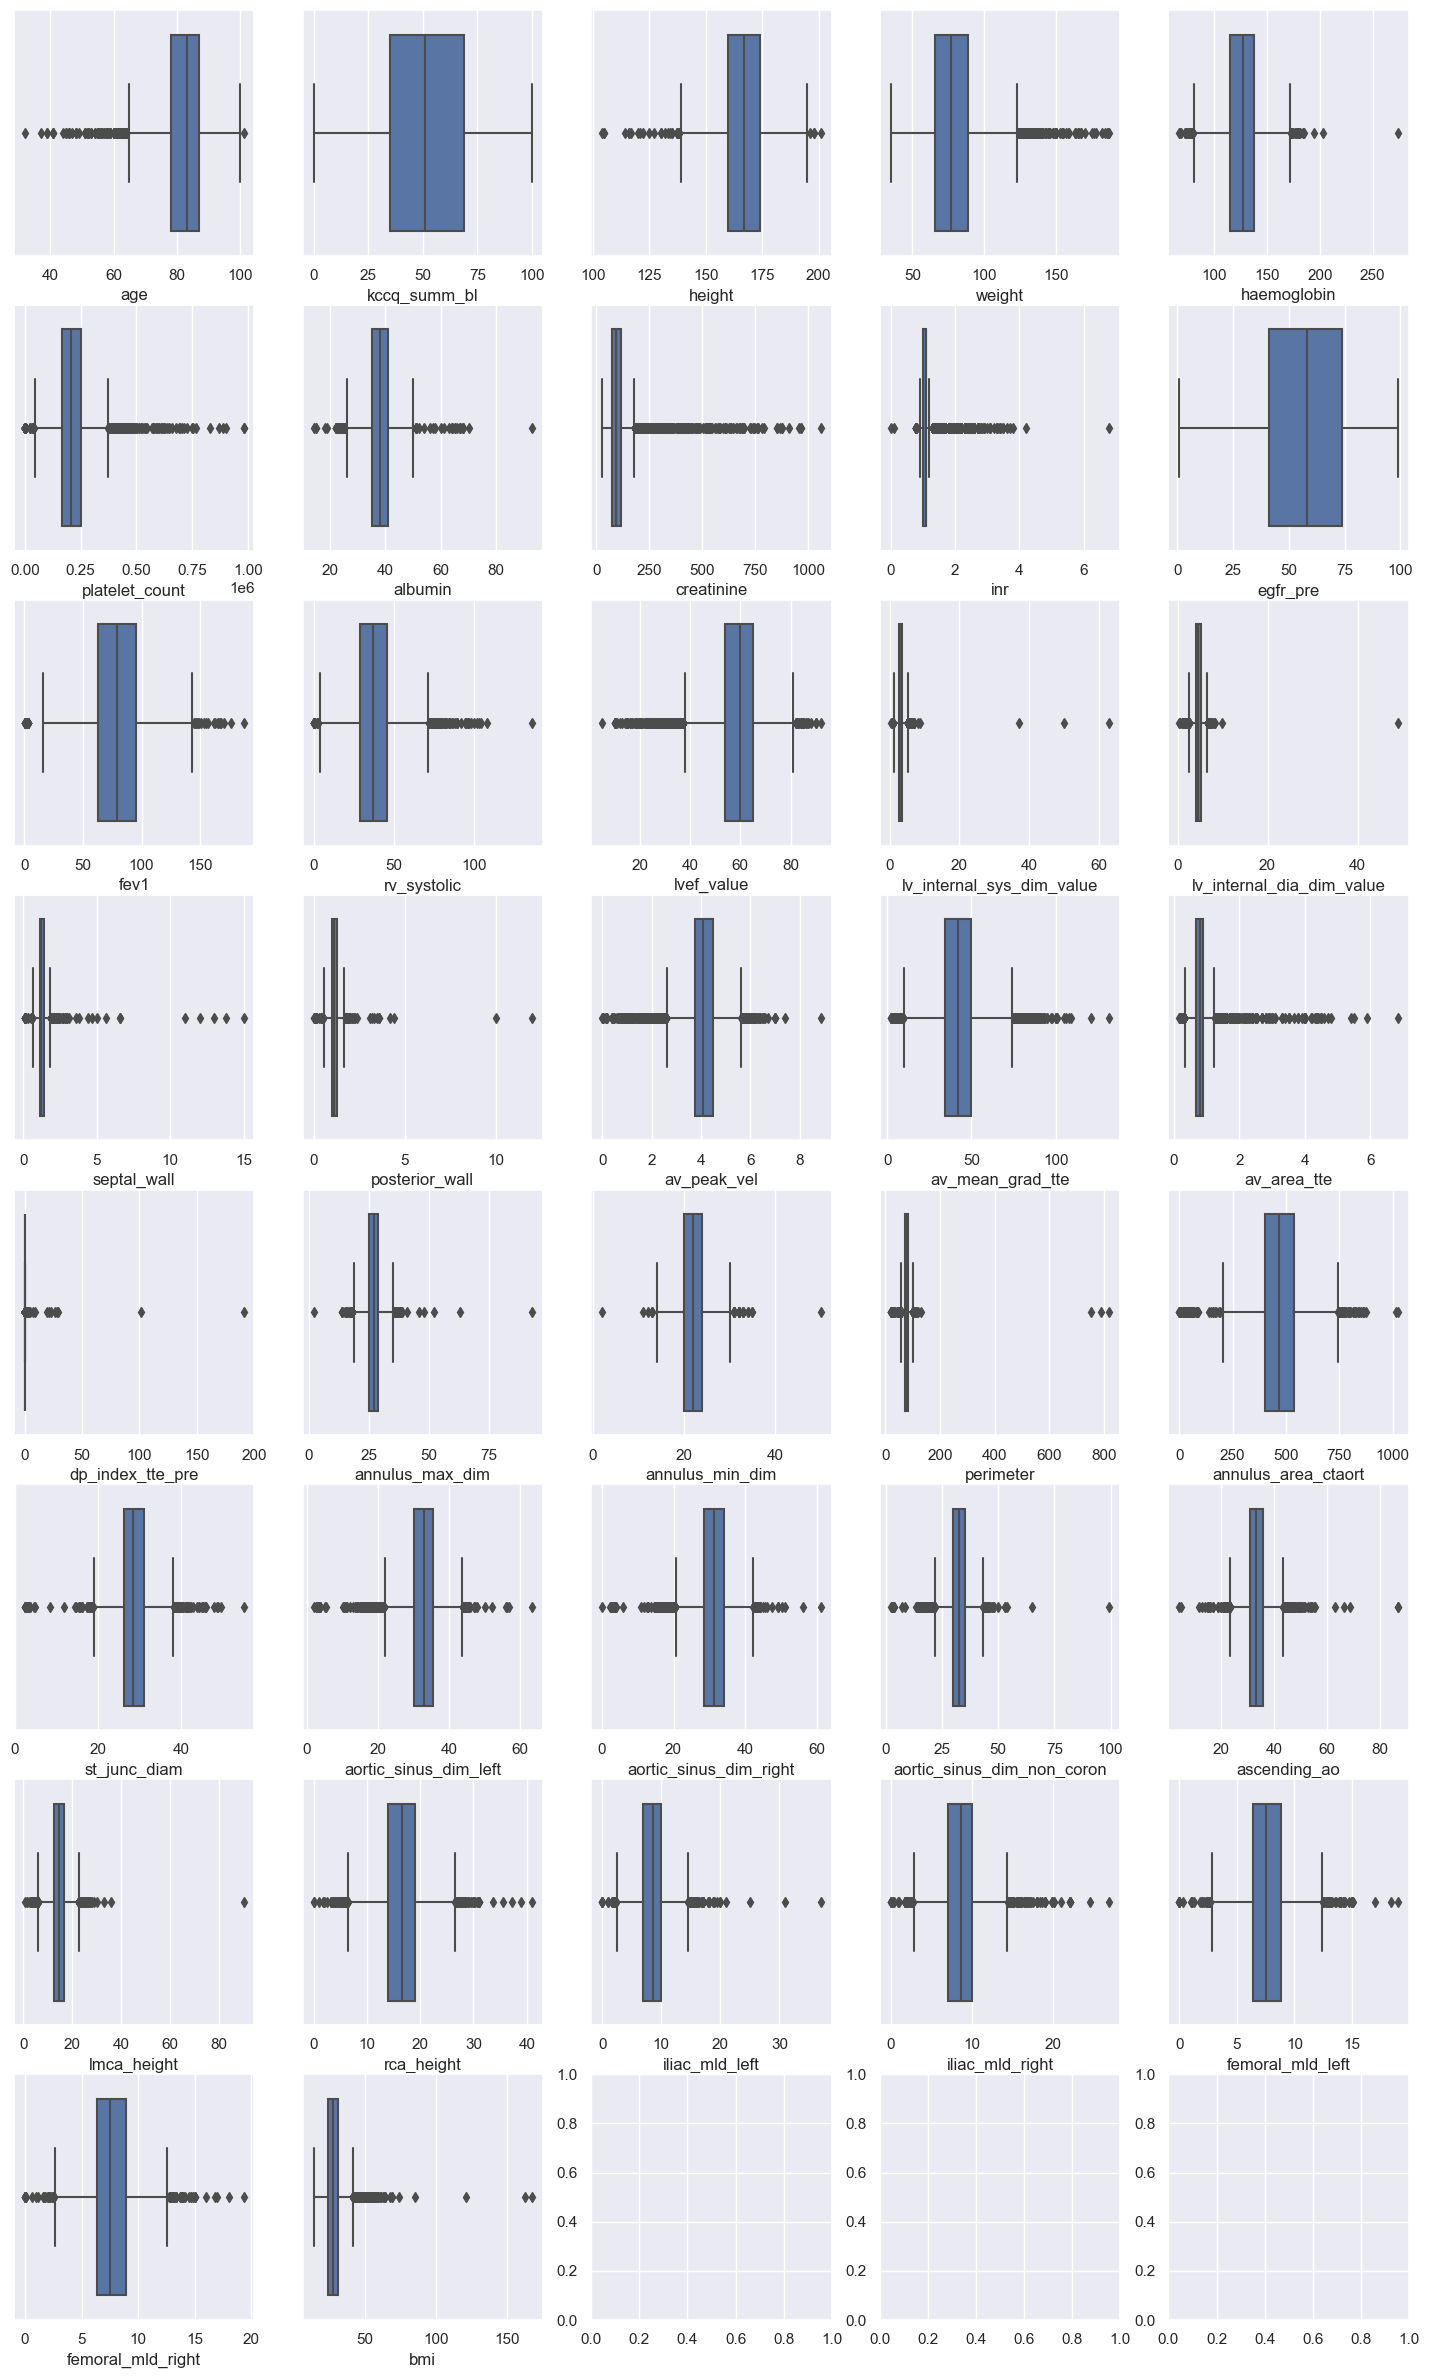

In [53]:
fig, axes = plt.subplots(8, 5, figsize=(18, 30))
i = 0
for c in float_col:
    sns.boxplot(ax=axes[int(i/5), i%5], data=df, x=c)
    i+=1

Features to watch out for outliers
- weight
- lv_internal_sys_dim_value
- lv_internal_dia_dim_value
- av_peak_val
- av_area_tte
- dp_index_tte_pre
- perimeter
- ascending_ao
- lmca_height

C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

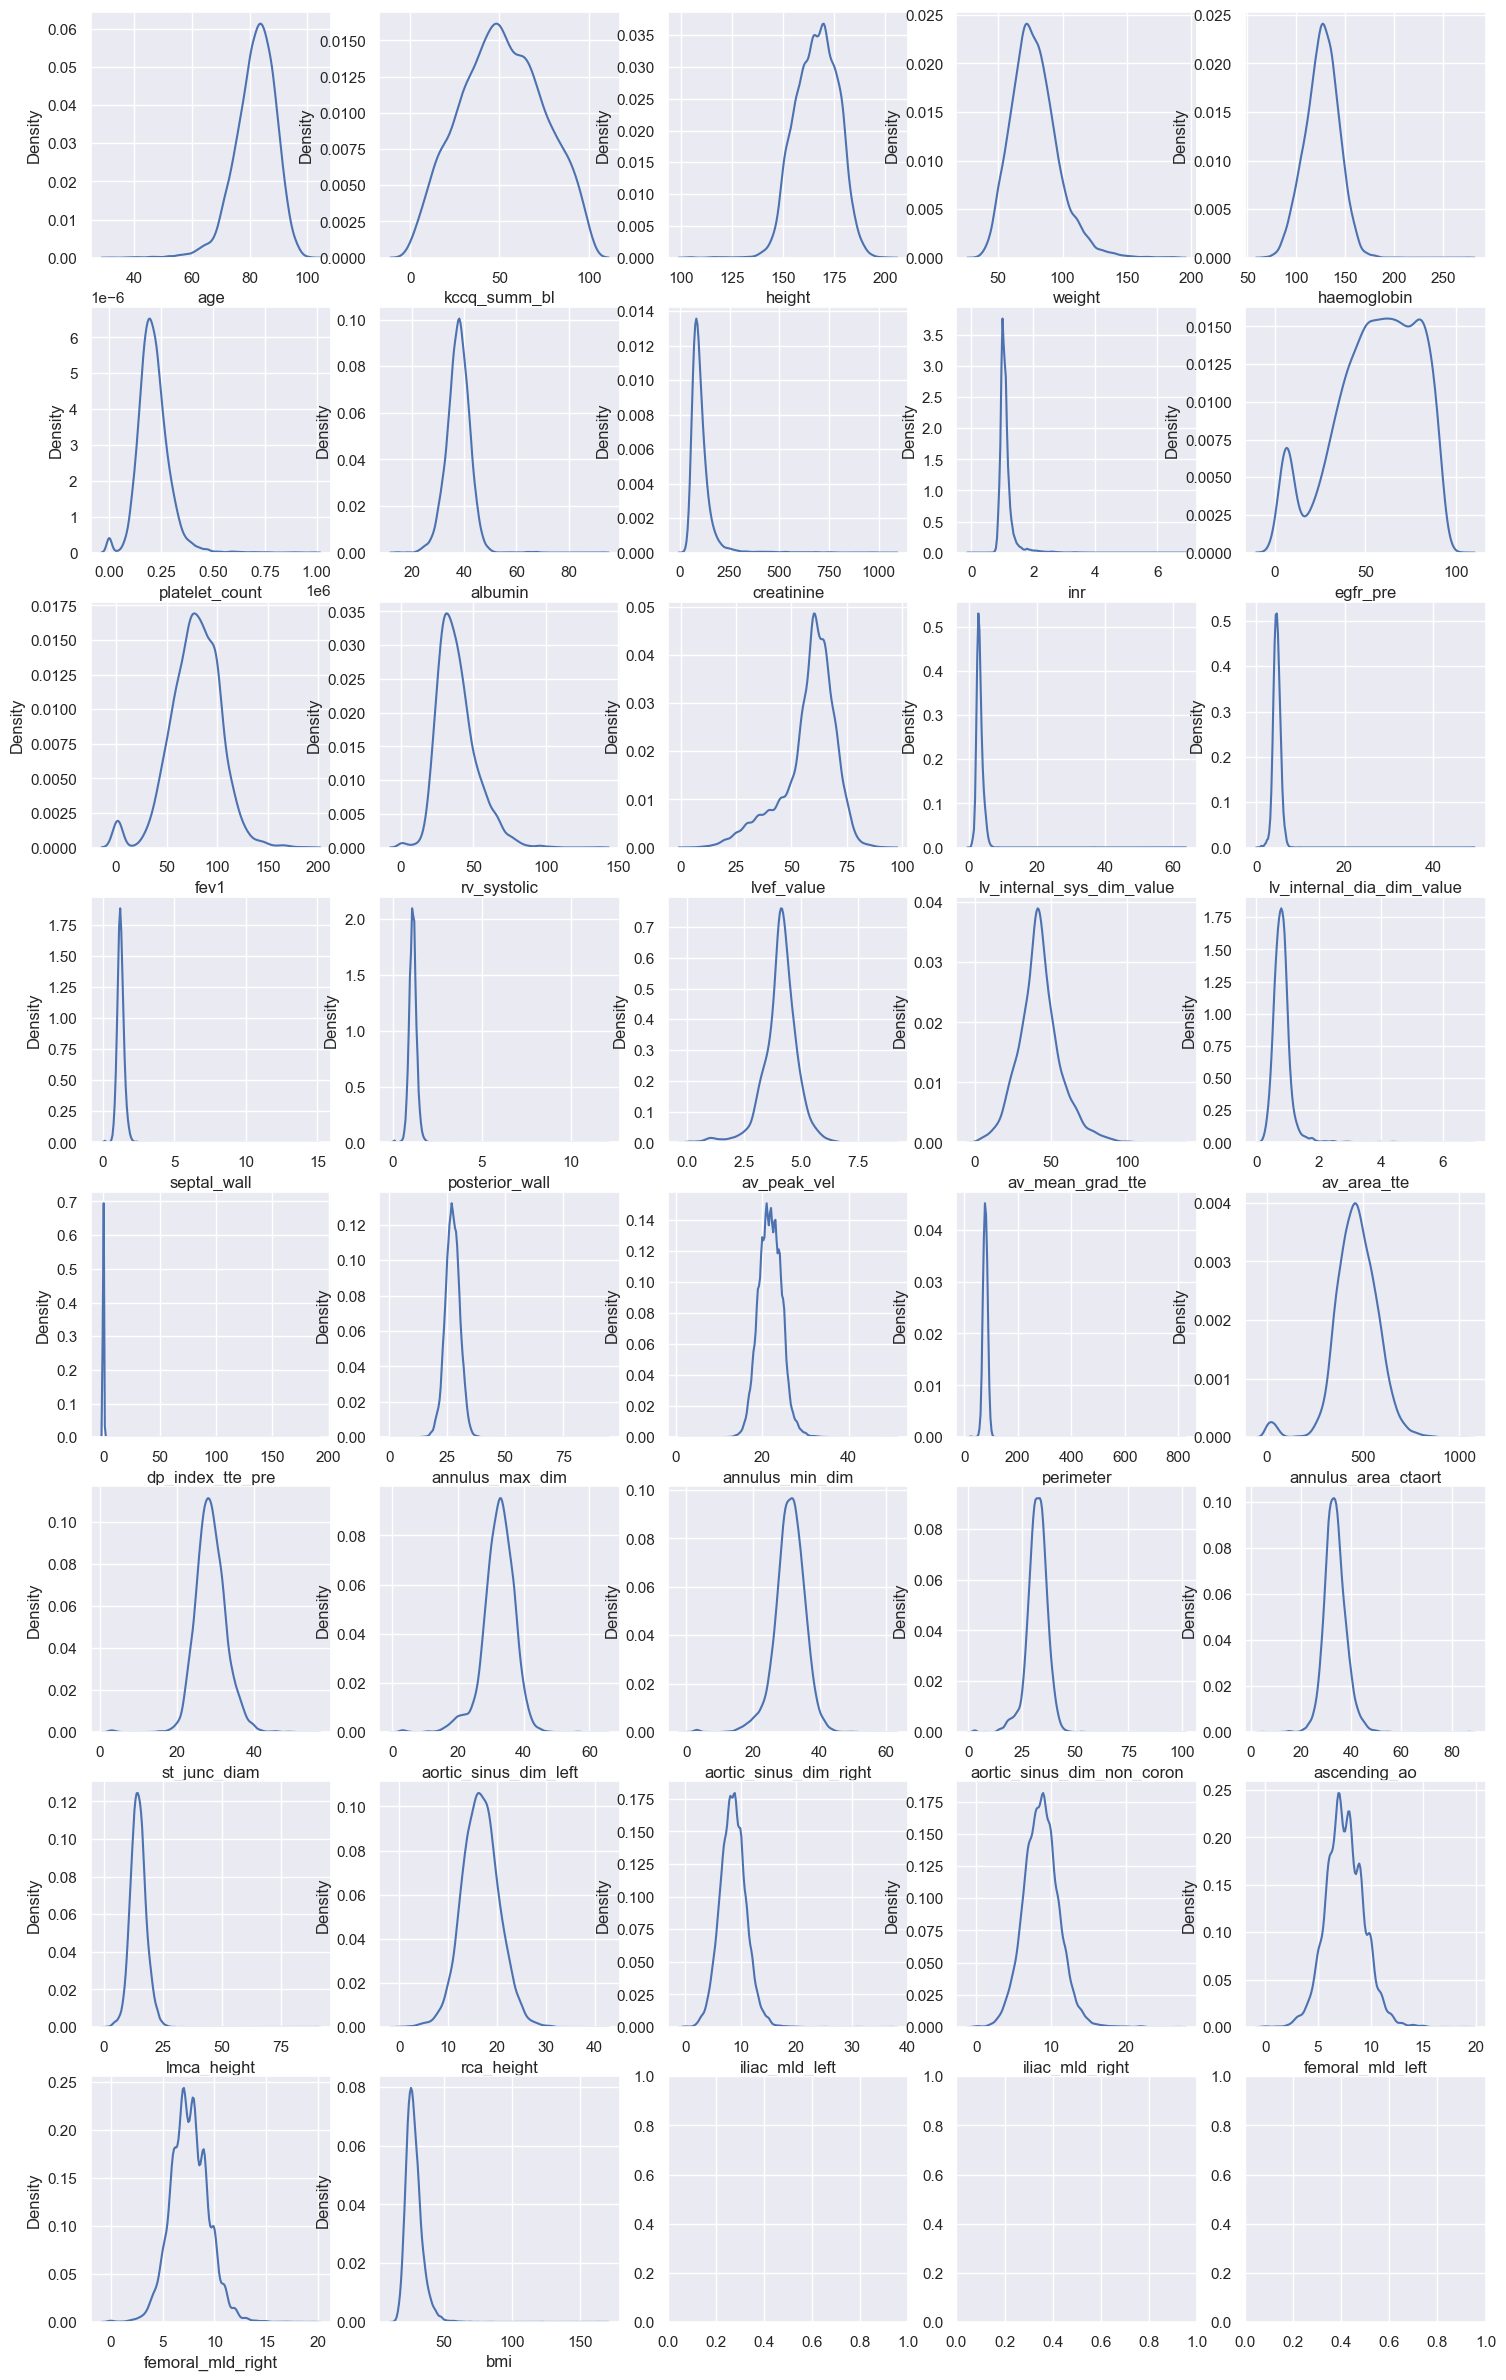

In [54]:
fig, axes = plt.subplots(8, 5, figsize=(18, 30))
i = 0
for c in float_col:
    sns.kdeplot(ax=axes[int(i/5), i%5], data=df, x=c,common_norm=False)
    i+=1

- `rv_systolic` is right skewed
- `lvef_value` is left skewed

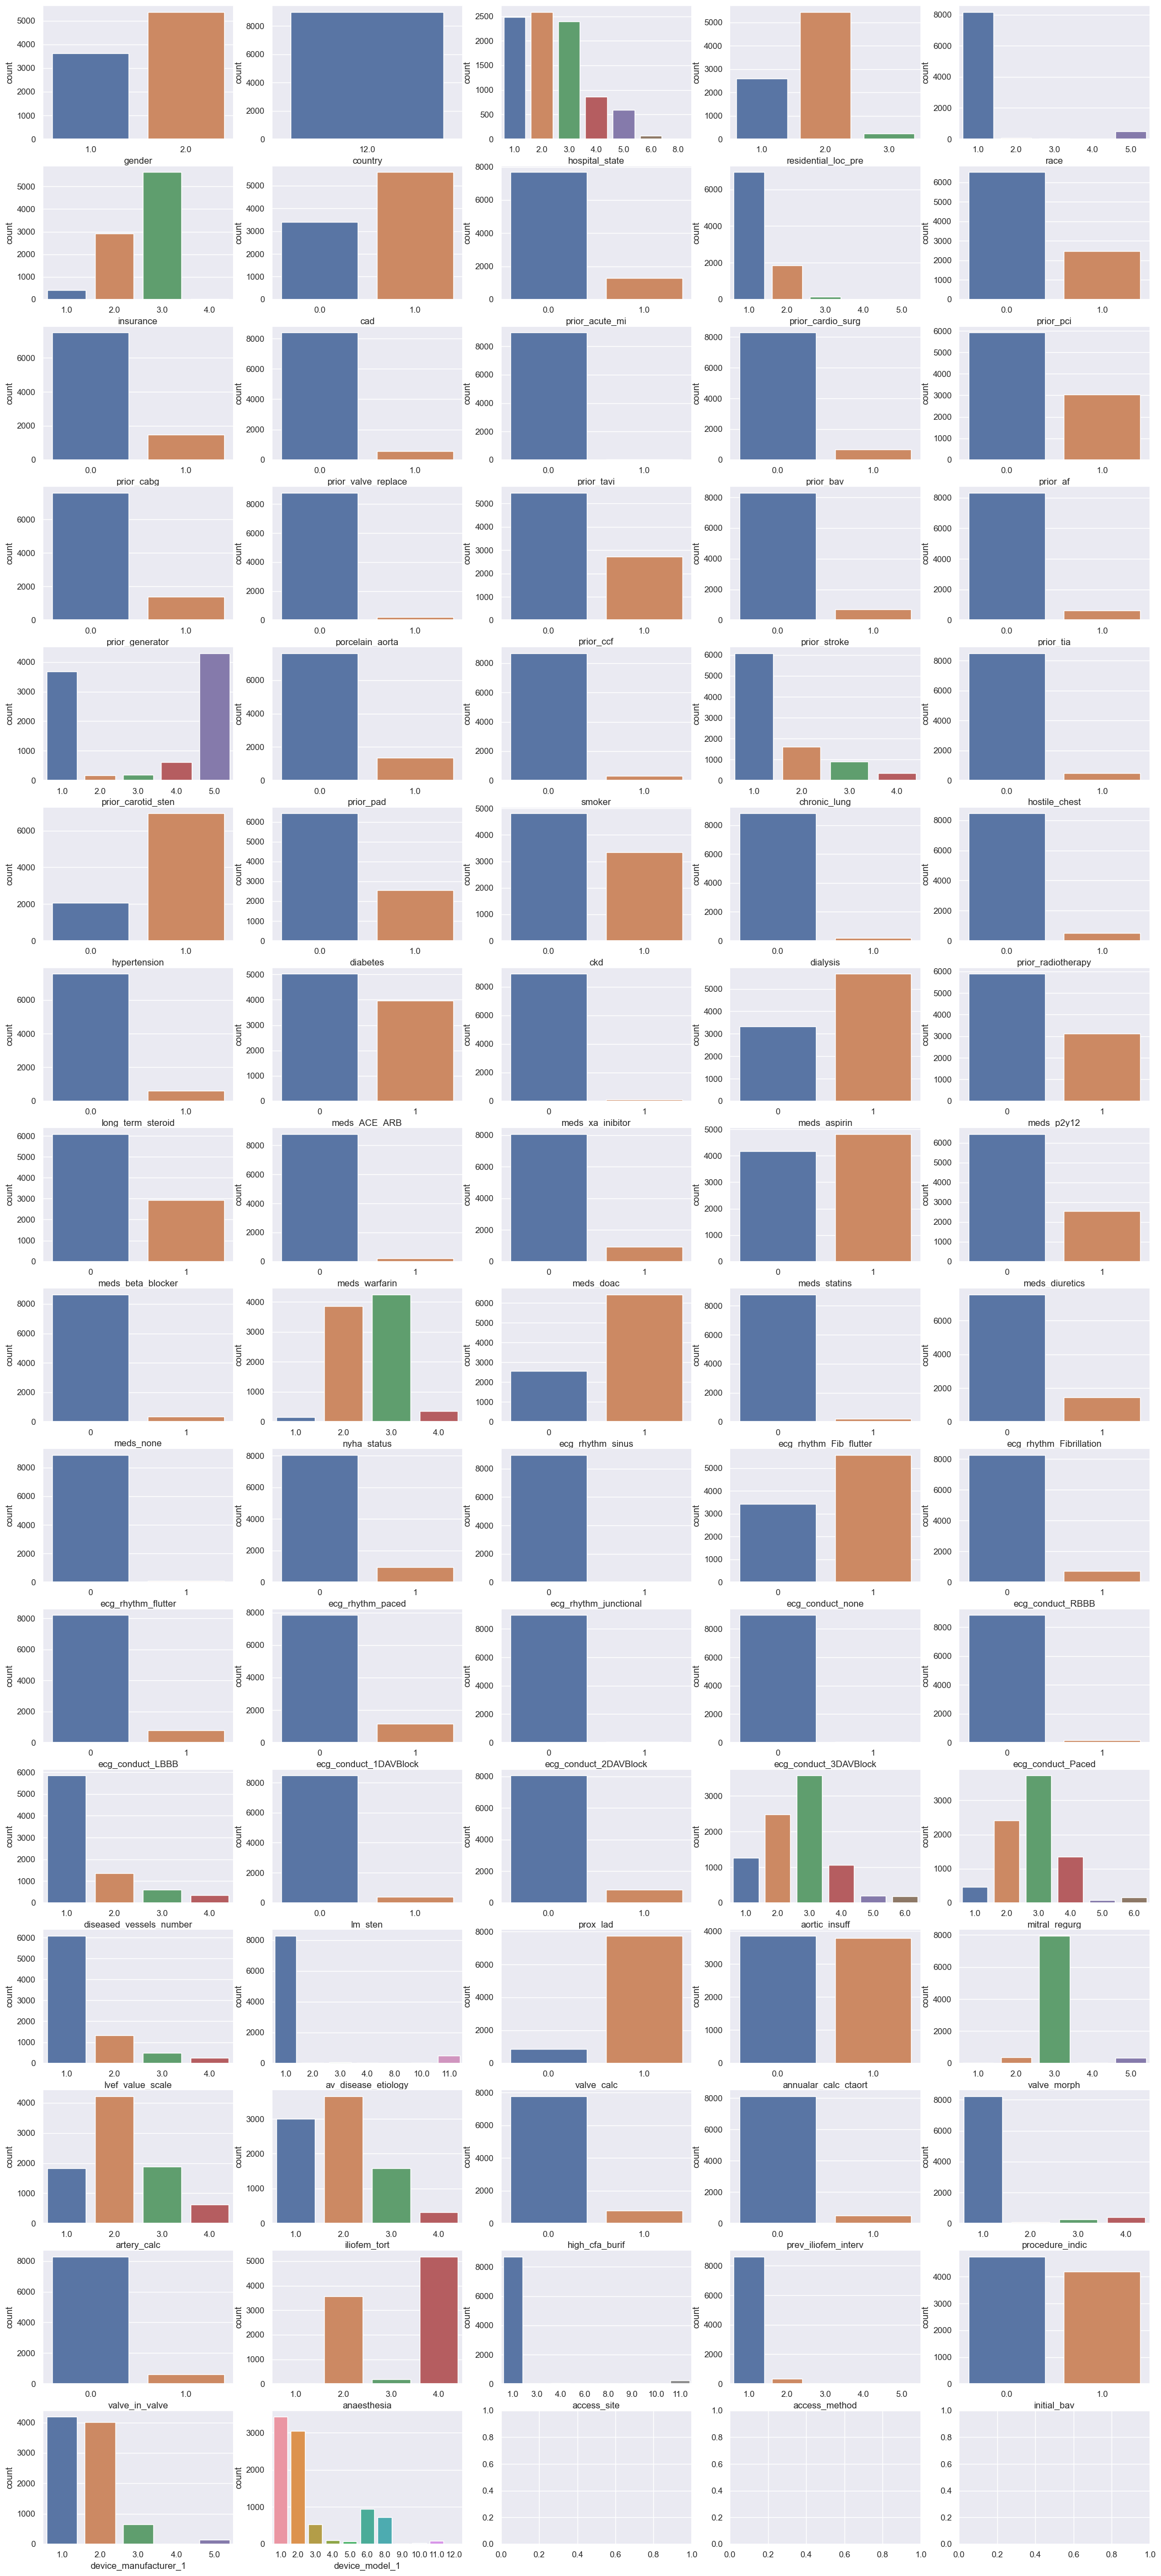

In [55]:
fig, axes = plt.subplots(16, 5, figsize=(26, 60))
i = 0
for c in categorical_col:
    sns.countplot(data=df, x=c,ax=axes[int(i/5), i%5])
    i+=1

some categorical features where values are underrepresented and probably can be dropped
- `country`
- `race` mostly caucasian
- `prior_tavi` 
- `porcelain_aorta`
- `smoker`
- `hostile_chest`
- `dialysis`
- `prior_radiotherapy`
- `long_term_steroid`
- `meds_xa_inibitor`
- `meds_warfarin`
- `meds_none`
- `ecg_rhythm_Fib_flutter`
- `ecg_rhythm_flutter`
- `ecg_rhythm_junctional`
- `ecg_conduct_2DAVBlock`
- `ecg_conduct_3DAVBlock`
- `ecg_conduct_Paced`
- `lm_sten`
- `access_method`
- `access_site`

some features where categories should be combined
- `insurance`
- `prior_cardio_surg`
- `prior_carotid_sten`
- `aortic_insuff`
- `mitral_regurg`
- `av_disease_etiology`
- `valve_morph`
- `procedure_indic`
- `anaesthesia`
- `device_manufacturer_1`
- `device_model_1`

In [39]:
number_missing = 3010
features_to_drop = [
    'country'
    ,'race'  
    ,'prior_tavi'
    ,'porcelain_aorta'
    ,'smoker'
    ,'hostile_chest'
    ,'dialysis'
    ,'prior_radiotherapy'
    ,'long_term_steroid'
    ,'meds_xa_inibitor'
    ,'meds_warfarin'
    ,'meds_none'
    ,'ecg_rhythm_Fib_flutter'
    ,'ecg_rhythm_flutter'
    ,'ecg_rhythm_junctional'
    ,'ecg_conduct_2DAVBlock'
    ,'ecg_conduct_3DAVBlock'
    ,'ecg_conduct_Paced'
    ,'lm_sten'
    ,'access_method'
    ,'access_site'
    ,'device_manufacturer_1'
    ,'device_model_1'
    ,'hospital_state'
    ,'insurance'
    ,'residential_loc_pre'
]

features_to_drop += list(
    null_counts.query('counts > @number_missing').drop(predictors + ['fup_status_12mth_new'],errors='ignore').index)

features_to_keep = ['av_area_tte','device_manufacturer_1','dialysis']
features_to_drop = [ele for ele in features_to_drop if ele not in features_to_keep]

# keep 
# rv_systolic - over half missing
# av_area_tte
# device manufacturer merge "other"
# dialysis maybe,''

In [40]:
null_counts.iloc[:20]

,counts,% missing
days_death,15468,0.954402
fev1,10639,0.656445
rv_systolic,7776,0.479793
days_12mth_fup,7168,0.442278
fup_status_12mth,7110,0.438699
lv_internal_sys_dim_value,5643,0.348183
dp_index_tte_pre,4256,0.262603
inr,4239,0.261554
aortic_sinus_dim_non_coron,3587,0.221324
aortic_sinus_dim_right,3505,0.216265


In [41]:
print(features_to_drop)

['country', 'race', 'prior_tavi', 'porcelain_aorta', 'smoker', 'hostile_chest', 'prior_radiotherapy', 'long_term_steroid', 'meds_xa_inibitor', 'meds_warfarin', 'meds_none', 'ecg_rhythm_Fib_flutter', 'ecg_rhythm_flutter', 'ecg_rhythm_junctional', 'ecg_conduct_2DAVBlock', 'ecg_conduct_3DAVBlock', 'ecg_conduct_Paced', 'lm_sten', 'access_method', 'access_site', 'device_model_1', 'hospital_state', 'insurance', 'residential_loc_pre', 'fev1', 'rv_systolic', 'lv_internal_sys_dim_value', 'dp_index_tte_pre', 'inr', 'aortic_sinus_dim_non_coron', 'aortic_sinus_dim_right', 'aortic_sinus_dim_left']


In [42]:
df_clean = df.drop(features_to_drop,axis=1)

In [43]:
### combine categories of certain features

# combine higher than 2+moderate aortic_insuff 
df_clean['aortic_insuff'] = [4 if x >=4  else x for x in df_clean['aortic_insuff']]

# equal to or higher than mild
df_clean['mitral_regurg'] = [1 if x >=3  else 0 for x in df_clean['mitral_regurg']]

# degenerative vs other (2)
df_clean['av_disease_etiology'] = [2 if x >=2  else x for x in df_clean['av_disease_etiology']]

# triscupid vs other (0)
df_clean['valve_morph'] = [1 if x ==3  else 0 for x in df_clean['valve_morph']]

# predominant AS vs other (0)
df_clean['procedure_indic'] = [1 if x ==1  else 0 for x in df_clean['procedure_indic']]

# Conscious sedation vs  General anaesthesia vs other (1)
df_clean['anaesthesia'] = [1 if x == 3  else x for x in df_clean['anaesthesia']]

# nyha status of equal or less than 2 or not
df_clean['nyha_status'] = [2 if x <= 2  else 3 for x in df_clean['nyha_status']]

# has prior cardio surgery
df_clean['prior_cardio_surg'] = [1 if x >= 2 else 0 for x in df_clean['prior_cardio_surg']]

# has device_manufacturer - merge into "other"
df_clean['device_manufacturer_1'] = [3 if x >= 3 else x for x in df_clean['device_manufacturer_1']]

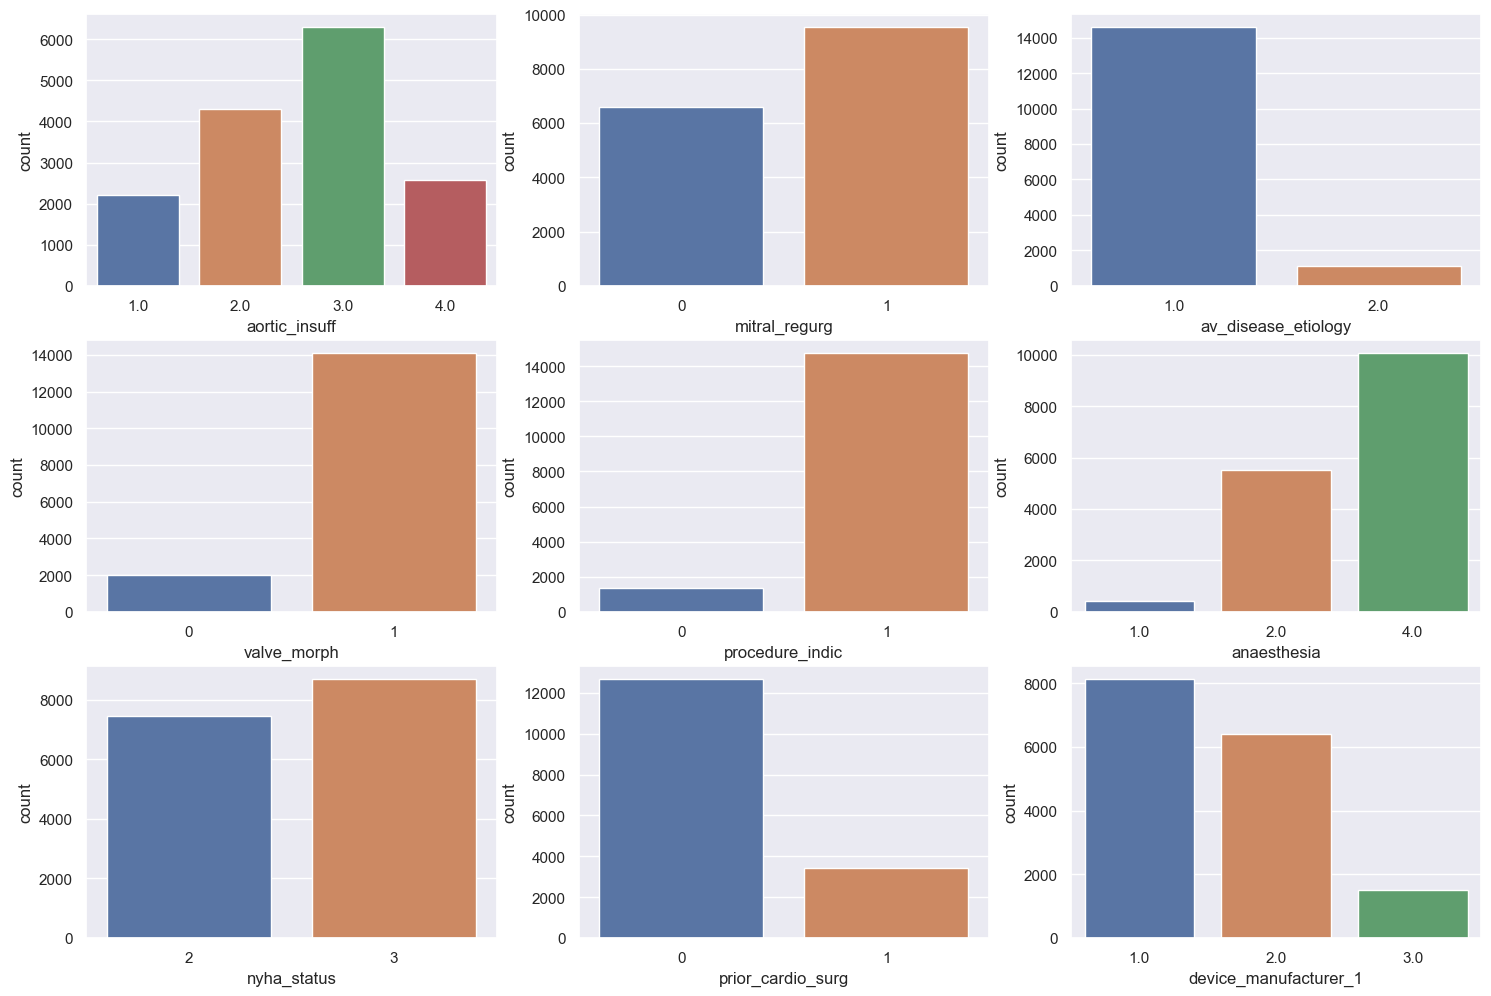

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
i = 0
for c in ['aortic_insuff','mitral_regurg','av_disease_etiology',
          'valve_morph','procedure_indic','anaesthesia',
          'nyha_status','prior_cardio_surg',
         'device_manufacturer_1']:
    sns.countplot(data=df_clean, x=c,ax=axes[int(i/3), i%3])
    i+=1

In [44]:
# we require non positive numbers for model
df_clean['lower_bound'] = [1e-5 if x == 0  else x for x in df_clean['lower_bound']]
df_clean['upper_bound'] = [1e-5 if x == 0  else x for x in df_clean['upper_bound']]
df_clean = df_clean.query('lower_bound>0')

In [45]:
interval_df = df_clean.query("(lower_bound !=upper_bound) and death_observed == False and death_in_study == True")

In [46]:
df_clean["event_observed"] = df_clean["death_in_study"]
df_clean["event_max"] = df_clean["lower_bound"]
df_clean["event_min"] = df_clean["lower_bound"]
df_clean["event_mid"] = df_clean["lower_bound"]

df_clean.loc[interval_df.index,"event_max"] = df_clean.loc[interval_df.index,"upper_bound"]
df_clean.loc[interval_df.index,"event_min"] = df_clean.loc[interval_df.index,"lower_bound"]
df_clean.loc[interval_df.index,"event_mid"] = round((df_clean.loc[interval_df.index,"lower_bound"] + df_clean.loc[interval_df.index,"upper_bound"])/2)

In [47]:
df_clean.query("(lower_bound !=upper_bound) and death_observed == False and death_in_study == True")

,gender,age,cad,prior_acute_mi,prior_cardio_surg,prior_pci,prior_cabg,prior_valve_replace,prior_bav,prior_af,...,fup_status_30d_new,upper_bound,lower_bound,death_observed,death_in_study,bmi,event_observed,event_max,event_min,event_mid
ID,,,,,,,,,,,,,,,,,,,,,
63,2.0,88.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,...,1.0,362.0,28.0,False,True,32.000966,True,362.0,28.0,195.0
520,2.0,77.0,1.0,0.0,0,1.0,0.0,0.0,0.0,1.0,...,1.0,392.0,22.0,False,True,25.102391,True,392.0,22.0,207.0
550,1.0,88.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,265.0,39.0,False,True,32.029086,True,265.0,39.0,152.0
630,2.0,89.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,...,1.0,201.0,60.0,False,True,21.453287,True,201.0,60.0,130.0
685,2.0,80.0,0.0,0.0,1,0.0,1.0,0.0,0.0,1.0,...,2.0,34.0,5.0,False,True,22.675737,True,34.0,5.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15151,2.0,85.0,1.0,1.0,0,1.0,0.0,0.0,0.0,1.0,...,1.0,371.0,32.0,False,True,27.609452,True,371.0,32.0,202.0
15192,2.0,82.0,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0,...,1.0,144.0,33.0,False,True,33.742423,True,144.0,33.0,88.0
15194,1.0,79.0,0.0,0.0,1,0.0,0.0,0.0,1.0,1.0,...,2.0,5.0,2.0,False,True,30.818540,True,5.0,2.0,4.0


C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

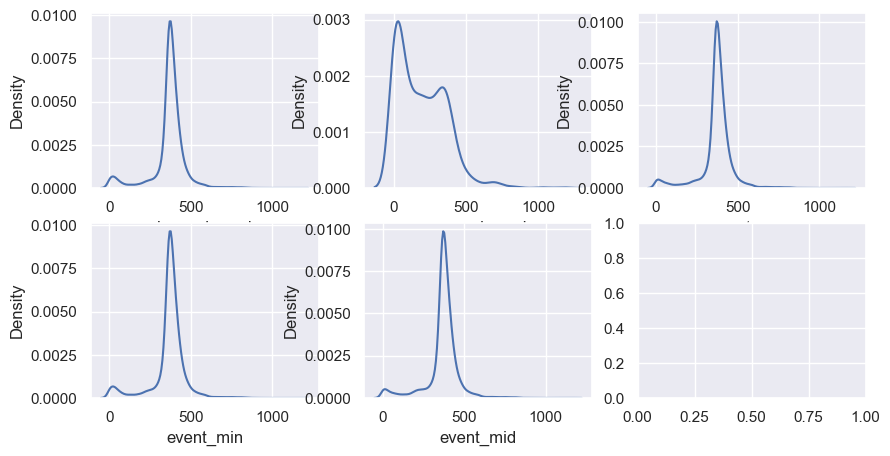

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
i = 0
for c in ['lower_bound','upper_bound',"event_max","event_min","event_mid"] :
    sns.kdeplot(ax=axes[int(i/3), i%3], data=df_clean, x=c,common_norm=False)
    i+=1

In [49]:
df_clean.query("(lower_bound !=upper_bound) and death_observed == False and death_in_study == True and upper_bound >415")

,gender,age,cad,prior_acute_mi,prior_cardio_surg,prior_pci,prior_cabg,prior_valve_replace,prior_bav,prior_af,...,fup_status_12mth_new,fup_status_30d_new,upper_bound,lower_bound,death_observed,death_in_study,event_observed,event_max,event_min,event_mid
ID,,,,,,,,,,,,,,,,,,,,,
2936,2.0,72.0,1.0,0.0,0,1.0,0.0,0.0,1.0,0.0,...,2.0,1.0,488.0,28.0,False,True,True,488.0,28.0,258.0
3695,1.0,77.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,...,2.0,1.0,431.0,39.0,False,True,True,431.0,39.0,235.0
3929,1.0,87.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,424.0,29.0,False,True,True,424.0,29.0,226.0
6136,2.0,93.0,1.0,1.0,1,0.0,1.0,0.0,0.0,0.0,...,2.0,NaN,532.0,31.0,False,True,True,532.0,31.0,282.0
6143,2.0,92.0,1.0,1.0,1,0.0,1.0,0.0,0.0,1.0,...,2.0,1.0,517.0,54.0,False,True,True,517.0,54.0,286.0
6595,2.0,87.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,...,2.0,1.0,553.0,42.0,False,True,True,553.0,42.0,298.0
6867,2.0,86.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,...,2.0,1.0,448.0,38.0,False,True,True,448.0,38.0,243.0
7087,1.0,86.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,677.0,17.0,False,True,True,677.0,17.0,347.0
7355,2.0,87.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,...,2.0,1.0,455.0,43.0,False,True,True,455.0,43.0,249.0


## Split

In [48]:
from sklearn.model_selection import train_test_split
outcome_columns = ['discharge_status', 'fup_status_30d', 'fup_status_12mth', 'days_death',
       'LOS', 'days_30d_fup', 'days_12mth_fup', 'proc_los',
       'discharge_status_new', 'fup_status_12mth_new', 'fup_status_30d_new',
       'upper_bound', 'lower_bound', 'death_observed', 'death_in_study',
        'event_observed', 'event_max','event_min','event_mid']

X = df_clean.drop(outcome_columns,axis=1)
y = df_clean[['lower_bound','upper_bound', 'death_observed', 'death_in_study',
              'discharge_status_new','fup_status_30d_new', 'fup_status_12mth_new',
        'event_observed', 'event_max','event_min','event_mid']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=random_seed)


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer,FunctionTransformer

In [50]:
adjusted_categorical_col = [x  for x in X.columns if x in categorical_col]
adjusted_float_col = [x  for x in X.columns if x in float_col]

In [51]:
X['lvef_value_scale']

ID
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
16205    1.0
16206    1.0
16207    1.0
16208    1.0
16209    1.0
Name: lvef_value_scale, Length: 16123, dtype: float64

In [52]:
adjusted_categorical_col

['gender',
 'cad',
 'prior_acute_mi',
 'prior_cardio_surg',
 'prior_pci',
 'prior_cabg',
 'prior_valve_replace',
 'prior_bav',
 'prior_af',
 'prior_generator',
 'prior_ccf',
 'prior_stroke',
 'prior_tia',
 'prior_carotid_sten',
 'prior_pad',
 'chronic_lung',
 'hypertension',
 'diabetes',
 'ckd',
 'dialysis',
 'meds_ACE_ARB',
 'meds_aspirin',
 'meds_p2y12',
 'meds_beta_blocker',
 'meds_doac',
 'meds_statins',
 'meds_diuretics',
 'nyha_status',
 'ecg_rhythm_sinus',
 'ecg_rhythm_Fibrillation',
 'ecg_rhythm_paced',
 'ecg_conduct_none',
 'ecg_conduct_RBBB',
 'ecg_conduct_LBBB',
 'ecg_conduct_1DAVBlock',
 'diseased_vessels_number',
 'prox_lad',
 'lvef_value_scale',
 'aortic_insuff',
 'mitral_regurg',
 'av_disease_etiology',
 'valve_calc',
 'annualar_calc_ctaort',
 'valve_morph',
 'artery_calc',
 'iliofem_tort',
 'high_cfa_burif',
 'prev_iliofem_interv',
 'procedure_indic',
 'valve_in_valve',
 'anaesthesia',
 'initial_bav',
 'device_manufacturer_1']

In [55]:
impute_and_one_hot_encode = Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(sparse_output=False,drop='first')),
        #('scaler', StandardScaler())
    ])

impute_and_scale = Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        #('scaler', StandardScaler())
    ])

transformation = ColumnTransformer(transformers=[
        ("log", FunctionTransformer(np.log1p,feature_names_out = 'one-to-one'), ['lvef_value','egfr_pre']),
        ('power', PowerTransformer(method='yeo-johnson',standardize=False), ['kccq_summ_bl'])
    ],
    remainder='passthrough',
    verbose_feature_names_out = False)

numeric_pipeline = Pipeline([
        ('trans',transformation),
        ('scale',impute_and_scale)
    ])
    
featurisation = ColumnTransformer(transformers=[
    ("categorical", impute_and_one_hot_encode, adjusted_categorical_col),
    ('numeric', numeric_pipeline, adjusted_float_col)],
    verbose_feature_names_out = False)
featurisation

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['gender', 'cad', 'prior_acute_mi',
                                  'prior_cardio_surg', 'prior_pci',
                                  'prior_cabg', 'prior_valve_replace',
                                  'prior_bav', 'prior_af', 'prior_generator',
                                  'prior_ccf', 'prior_stroke', 'prior_...
                                  'creatinine', 'egfr_pre', 'lvef_value',
                                  'lv_internal_dia_dim_value', 'septal_wall',
                                  'posterior_wall', 'av_peak_vel',
                                  'av_mean_grad_tte', 'av_area_tte',
                                  'annulus_max_dim', 'annulus_min_dim',
                                  'perimeter', 'annulus_area_ctaort',
                                  'st_junc_diam', 'ascending_ao', 'lmca_height',
                                  'rca_height', 'iliac_mld_left',
                                  'iliac_mld_right', 'femoral_mld_left',
                                  'femoral_mld_right', 'bmi'])],
                  verbose_feature_names_out=False)

In [56]:
X_train_trans = featurisation.fit_transform(X_train)

X_test_trans = featurisation.transform(X_test)

In [57]:
temp_train = pd.concat([
    pd.DataFrame(X_train_trans,columns=list(featurisation.get_feature_names_out()),index=X_train.index),
    y_train],
    axis=1)
#temp_train.to_csv("train2.csv")
temp_test = pd.concat([
    pd.DataFrame(X_test_trans,columns=list(featurisation.get_feature_names_out()),index=X_test.index),
    y_test],
    axis=1)
#temp_test.to_csv("test2.csv")

In [ ]:
# check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler =  StandardScaler()
X_train_scale = scaler.fit_transform(X_train_trans)

vif_data = pd.DataFrame() 
vif_data["feature"] = featurisation.get_feature_names_out()
vif_data["VIF"] = [variance_inflation_factor(X_train_scale, i) 
                          for i in range(len(featurisation.get_feature_names_out()))] 


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vif_data.sort_values(by="VIF",ascending=False))

In [ ]:
ax = sns.lineplot(vif_data.sort_values(by="VIF",ascending=False),x='feature',y='VIF')
ax.set_xticklabels("")
ax.axhline(y = 5.526424,color='red',linestyle = '--') 
ax.axhline(y = 2.951884,color='orange',linestyle = '--') 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_trans,y_train['death_in_study'])

In [ ]:
coef_df = pd.DataFrame(data = {'variable' : list(featurisation.get_feature_names_out()),
                          'value' : lr.coef_[0]  })

coef_df = coef_df.sort_values('value', ascending=False)
plt.figure(figsize=(18, 18))
ax = sns.barplot(
data=coef_df, x="variable", y="value")
plt.setp(ax.get_xticklabels(), rotation=45)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(coef_df)

In [ ]:
temp_train.query('lower_bound > upper_bound')

In [67]:
from utils import exponential_transformation

In [80]:
# make a preprocesser for a subset of features (for the app)
app_features = [
    'kccq_summ_bl',
    'age',
    'haemoglobin',
    'creatinine',
    'weight',
    'albumin',
    'lvef_value',
    'av_area_tte']

X_train_sub = X_train[app_features]

impute_and_scale = Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        #('scaler', StandardScaler())
    ])

transformation = ColumnTransformer(transformers=[
        ("log", FunctionTransformer(np.log1p,feature_names_out = 'one-to-one'), ['lvef_value']),
        ('power', PowerTransformer(method='yeo-johnson',standardize=False), ['kccq_summ_bl']),
        #('albumin_exponential', 
        #     FunctionTransformer(exponential_transformation,feature_names_out = 'one-to-one', kw_args={"bounds": (33,48),'k':1e-1}),
        #     ['albumin'])
],
    remainder='passthrough',
    verbose_feature_names_out = False)


transformation2 = ColumnTransformer(transformers=[
        ('albumin_exponential', 
             FunctionTransformer(exponential_transformation,
                                 feature_names_out = 'one-to-one', 
                                 kw_args={"bounds": (33,48),'k':1e-1}),
                                 [6])
],
    remainder='passthrough',
    verbose_feature_names_out = False)

transform_pipeline = Pipeline([
        ('trans',transformation),
        ('scale',impute_and_scale),
        ('trans2',transformation2)
    ])

transform_pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>),
                                                  ['lvef_value']),
                                                 ('power',
                                                  PowerTransformer(standardize=False),
                                                  ['kccq_summ_bl'])],
                                   verbose_feature_names_out=False)),
                ('scale',
                 Pipeline(steps=[('impute',
                                  SimpleImputer(strategy='median'))])),
                ('trans2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('albumin_exponential',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function exponential_transformation at 0x000002BA924C3E20>,
                                                                      kw_args={'bounds': (33,
                                                                                          48),
                                                                               'k': 0.1}),
                                                  [6])],
                                   verbose_feature_names_out=False))])

In [81]:
X_train_trans_sub = transform_pipeline.fit_transform(X_train_sub)

In [82]:
pd.DataFrame(X_train_trans_sub,columns=transform_pipeline.get_feature_names_out())['albumin'].describe()

count    12898.000000
mean         1.059653
std          0.853774
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         90.017131
Name: albumin, dtype: float64

In [83]:
X_train_sub['albumin'].describe()

count    12005.000000
mean        37.972761
std          4.612040
min         14.000000
25%         35.000000
50%         38.000000
75%         41.000000
max         93.000000
Name: albumin, dtype: float64

In [62]:
import dill
with open("model/app_preprocesser.pkl", "wb") as f:
    dill.dump(transformation, f)

In [84]:
import joblib
joblib.dump(transform_pipeline, "model/app_preprocesser.pkl")

['model/app_preprocesser.pkl']

In [86]:
pro = joblib.load("model/app_preprocesser.pkl")
pd.DataFrame(X_train_trans_sub,columns=pro.get_feature_names_out())['albumin'].describe()

count    12898.000000
mean         1.059653
std          0.853774
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         90.017131
Name: albumin, dtype: float64

In [138]:
X_train_trans_sub[:,5]

array([ 98.,  73.,  66., ..., 109.,  60.,  67.])

In [139]:
X_train_sub

,kccq_summ_bl,age,haemoglobin,creatinine,weight,albumin,lvef_value,av_area_tte
ID,,,,,,,,
4405,NaN,85.0,119.0,120.0,98.0,45.0,61.0,1.10
10699,85.0,78.0,121.0,102.0,73.0,37.0,60.0,0.90
8677,9.0,85.0,116.0,124.0,66.0,37.0,29.0,0.74
3263,26.0,78.0,147.0,68.0,100.0,35.0,57.0,0.80
2459,NaN,89.0,123.0,132.0,59.0,36.0,50.0,0.50
...,...,...,...,...,...,...,...,...
13765,44.0,89.0,107.0,91.0,49.0,47.0,72.0,0.77
10760,52.0,89.0,103.0,107.0,89.0,36.0,60.0,1.00
8397,68.0,76.0,104.0,95.0,109.0,44.0,58.0,0.60


In [140]:
pd.DataFrame(X_train_trans_sub,columns=list(transform_pipeline.get_feature_names_out()),index=X_train_sub.index)

,lvef_value,kccq_summ_bl,age,haemoglobin,creatinine,weight,albumin,av_area_tte
ID,,,,,,,,
4405,4.127134,37.431445,85.0,119.0,120.0,98.0,45.0,1.10
10699,4.110874,58.212822,78.0,121.0,102.0,73.0,37.0,0.90
8677,3.401197,7.606278,85.0,116.0,124.0,66.0,37.0,0.74
3263,4.060443,20.020775,78.0,147.0,68.0,100.0,35.0,0.80
2459,3.931826,37.431445,89.0,123.0,132.0,59.0,36.0,0.50
...,...,...,...,...,...,...,...,...
13765,4.290459,32.202708,89.0,107.0,91.0,49.0,47.0,0.77
10760,4.110874,37.431445,89.0,103.0,107.0,89.0,36.0,1.00
8397,4.077537,47.643689,76.0,104.0,95.0,109.0,44.0,0.60


In [141]:
np.min(X_train_trans_sub[:,])

0.0